# Comparing 21cmFAST with 21cmEMU directly

In this tutorial, we will use 21cmFAST to simulate a lightcone and compare it with the output from 21cmEMU. 
We will compare the EoR history and global signal.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools


from py21cmemu import Emulator

from matplotlib import rcParams
rcParams.update({'font.size': 12})

from py21cmemu.properties import USER_PARAMS, COSMO_PARAMS, FLAG_OPTIONS, emulator_properties
limits = emulator_properties.limits

In [171]:
p21c.__version__

'3.3.1.dev6+g95523bc'

In [2]:
# Let's take a test param that is already in 21cmFAST-friendly units
test_param = [-0.98454527, 0.84028646, -1.01608287, 0.03414988, 9.02499104, 0.45168016, 40.0, 500.0, 1.0]
keys = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC', 'M_TURN', 't_STAR', 'L_X','NU_X_THRESH', 'X_RAY_SPEC_INDEX']

input_dict = {k:v for k, v in zip(keys, test_param)}

In [3]:
input_dict

{'F_STAR10': -0.98454527,
 'ALPHA_STAR': 0.84028646,
 'F_ESC10': -1.01608287,
 'ALPHA_ESC': 0.03414988,
 'M_TURN': 9.02499104,
 't_STAR': 0.45168016,
 'L_X': 40.0,
 'NU_X_THRESH': 500.0,
 'X_RAY_SPEC_INDEX': 1.0}

In [4]:
ap = p21c.AstroParams(input_dict)

In [206]:
lightcone = p21c.run_lightcone(
    redshift = 6.0,
    max_redshift = 15.0,
    astro_params = ap,
    user_params =USER_PARAMS,
    lightcone_quantities=("brightness_temp", "density"),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    flag_options = FLAG_OPTIONS,
    cosmo_params = COSMO_PARAMS,
    direc='_cache'
)

In [207]:
np.savez('lightcone_example', redshifts = lightcone.node_redshifts,
                      xHI = lightcone.global_xHI,
                      Tb = lightcone.global_brightness_temp,
                      pars = input_dict
                      )

In [7]:
lightcone = np.load('lightcone_example.npz')

In [8]:
emu = Emulator()

In [9]:
theta, out, errs = emu.predict(input_dict)

In [10]:
zs = out.redshifts
xHI = out.xHI
Tb = out.Tb

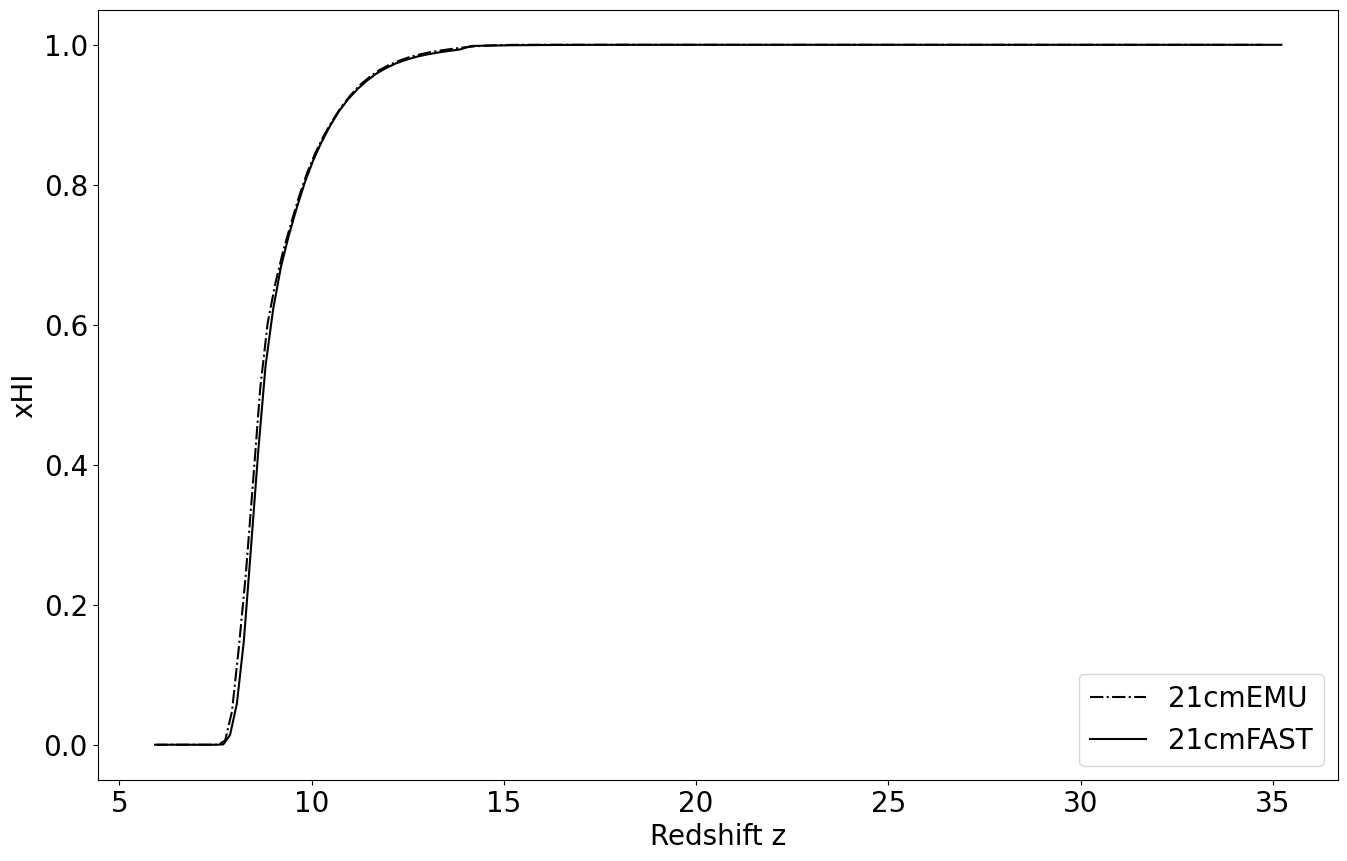

In [11]:
plt.figure(figsize = (16,10))

plt.plot(zs, xHI, ls = '-.', color = 'k', label = '21cmEMU')
#plt.plot(lightcone.node_redshifts, lightcone.global_xHI, color = 'k', label = '21cmFAST')
plt.plot(lightcone['redshifts'], lightcone['xHI'], color = 'k', label = '21cmFAST')

plt.legend(fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(r'xHI', fontsize = 20)
plt.xlabel(r'Redshift z', fontsize = 20)
plt.show()

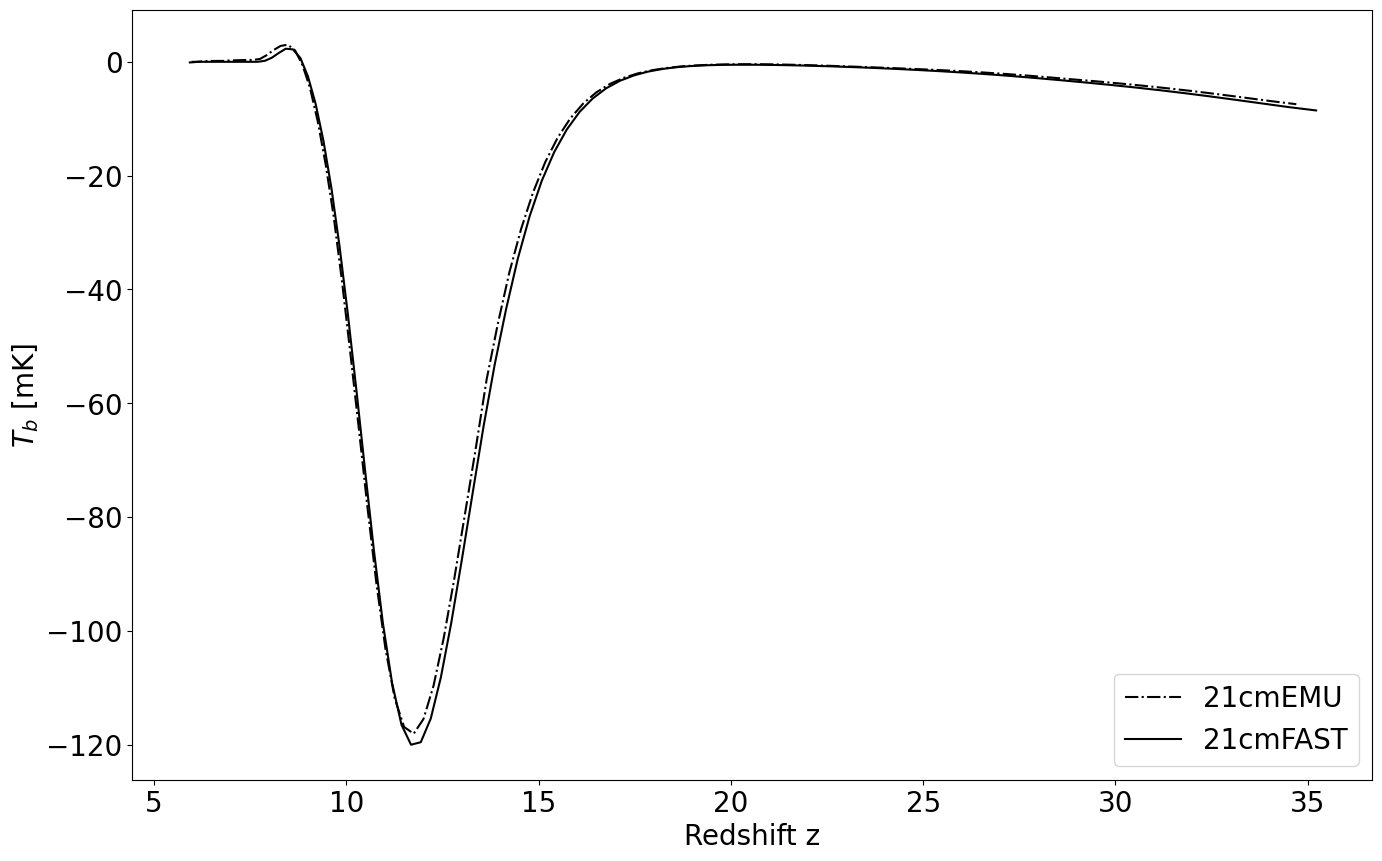

In [12]:
# Directly compare Tb from test set and Tb predicted by emulator
N = 7
cs = ['k','r','lime','b', 'orange', 'cyan', 'magenta', 'coral']
plt.figure(figsize = (16,10))

plt.plot(zs, Tb, ls = '-.', color = 'k', label = '21cmEMU')
#plt.plot(lightcone.node_redshifts, lightcone.global_brightness_temp, color = 'k', label = '21cmFAST')
plt.plot(lightcone['redshifts'], lightcone['Tb'], color = 'k', label = '21cmFAST')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(r'$T_b$ [mK]', fontsize = 20)
plt.xlabel(r'Redshift z', fontsize = 20)
plt.show()